# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
    * The group must be registered on the course site on DTU Learn: My Course > Groups
    * Groups must be registered anew (even if you already registered for Project 1)
* This project must be handed in as a jupyter notebook to the course site on DTU Learn. 
    * Go to the Course Content > Assignments tab to upload your submission. 
* This project is due on Monday, November 29, 20:00.

## Submission rules

* Each group has to hand in *one* notebook (`.ipynb`) with their solutions, including a filled out Contribution table (see below).
* Your solution must be written in Python.
* For each question you should use the cells provided ("`# your code goes here`" and "*your explanation here*") for your solution
    * It is allowed to add code cells within a question block, but consider if it's really necessary.
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable and readable from top to bottom.
    * Meaning that your code cells work when run in order (from top to bottom).
    * Output of any cell depends only on itself and cells above it.
* Your notebook should be submitted after having been run from top to bottom.
    * This means outputs are interpretable without necessarily running your cells.
    * The simplest way to achieve this is using the jupyter menu item Kernel > Restart & Run All just prior to submission. If any cell fails when you do this, your notebook is not ready for submission.
    * Exercise 3 in particular will take time to finish, plan accordingly, that is, make sure you have time to run your notebook from top to bottom.
* Failure to comply may make it impossible for us to evaluate your submission properly, which will likely negatively impact the points awarded.

## Solution guidelines
* Data processing is via Spark for the first three exercises and pandas/SQL in the fourth exercise.
* Where naming of dataframes and functions are explicitly stated, these must be used.
* Your solutions will be evaluated by correctness, code quality and interpretability of the output. 
    * You have to write clean, readable and efficient Spark code that will generate sensible execution plans.
    * You have to write clean, readable and efficient SQL queries.
    * Your tables and visualisations should be meaningful and easy to read. This requires, but is not limited to, including headers, legends and well-written (brief) descriptions for graphs/charts. In this step you've found the data processing solution, so put also some effort into its presentation.

## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 150.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
    * Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
    * Several group members can take credit for the same solution if they all have contributed substantially to it.
* Each group member must contribute **at least 65 points**. 
    * If no name is provided for an exercise's part, **all group members** are considered contributors to it.
* Group members should decide amongst themselves how to collaborate on the project to meet these constraints.  
* Scores are individual. The score $\text{score}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{score}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$
  
  
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | John      |
| **Part 4** | Ann       |  Ann          |     John, Mary       | John       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |


* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4 which are all wrong. Then Ann's score is calculated as follows:

  * $\text{individual-score}(Ann) = \frac{5+5+10+5+5+15+15}{5+5+10+5+5+15+15+15+5} = \frac{60}{80} = 0.75$

  * $\text{group-score} = \frac{95}{150} = 0.633$

  * $\text{score}(Ann) = 7.5\cdot 0.75 + 2.5 \cdot 0.633 = 7.21$


# Group contribution table 

This table must be filled before submission.



In [1]:
import pandas as pd

d = {'Exercise 1' : ['', '', '', '', 'n.a'], 
     'Exercise 2' : ['', '', '', '', ''],
     'Exercise 3' : ['', '', '', '', 'n.a'],
     'Exercise 4' : ['', '', '', '', 'n.a'],
     } 
  
ct = pd.DataFrame(d, index=['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,n.a,,n.a,n.a


# The AirBnB dataset

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="400"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In the first three exercises you will use Spark to analyze data obtained from the Airbnb website (stricly speaking via data scraped by [insideairbnb](http://insideairbnb.com/get-the-data.html)). The purpose of your analysis is to extract insights about listings as a whole, specifics about London, and sentiment analysis of reviews (word positivity).


## Loading data
The dataset consists of listings (offered lodgings) and reviews (submitted by users). The `.csv`'s you'll work with vary between the first three exercises, but is structured so that the function below will load it into a spark dataframe.

In [17]:
def load_csv_as_dataframe(path):
    return spark.read.option('header', True) \
                .option('inferSchema', True) \
                .option('multiLine', 'True') \
                .option('escape', '"') \
                .option('mode', 'DROPMALFORMED')\
                .csv(path)

## Imports and Spark session

* You'll need to adapt the `JAVA_HOME` environment variable to your setup. 
* You should set the `spark.driver.memory` value to the amount of memory on your machine. 
* It may be required for you to install some of the packages imported below (e.g. pandasql).

In [18]:
# Instructions on p. 20 Learning Spark, 2nd ed.
# Here's a quick-guide, googling may also be required
# 1) Install pyspark via conda/pip
#          pyspark requires the JAVA_HOME environment variable is set.
# 2) Install JDK 8 or 11, figure out the install location
#          Suggest to use https://adoptopenjdk.net/
# 3) Update the JAVA_HOME environment variable set programmatically below 
#    with your install location specifics

# JAVA_HOME environment variable is set programatically below
# but you must point it to your local install

import os
# os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-11.0.13.0.8-1.el7_9.x86_64'

os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk1.8.0_251"
# If you get "Job aborted due to stage failure" and 
# "Python worker failed to connect back." exceptions, 
# this should be solved by additionally setting these 
# environment variables

os.environ['PYSPARK_PYTHON'] = 'python'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import DoubleType, FloatType

try:
    from pandas_profiling import ProfileReport
    from datetime import datetime
except ModuleNotFoundError: 
    !pip install pandas_profiling --user
import pandasql as psql

In [21]:
# Sets memory limit on driver and to use all CPU cores
conf = SparkConf().set('spark.ui.port', '4050') \
        .set('spark.driver.memory', '8g') \
        .setMaster('local[*]')

sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [6]:
spark

In [7]:
sc.getConf().getAll()

[('spark.app.startTime', '1638211584733'),
 ('spark.executor.id', 'driver'),
 ('spark.sql.warehouse.dir',
  'file:/L:/DTU/CTDS/project%202/final/spark-warehouse'),
 ('spark.driver.port', '64177'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.app.id', 'local-1638211586794'),
 ('spark.ui.port', '4050'),
 ('spark.driver.host', '10.209.225.212'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.memory', '8g'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

# Exercise 1: Listings and cities (20 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized).


## Part 1: Preparing the dataframe (5 pts)

Your data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/listings.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_listings`.

After the data is read, you should select the columns necessary for exercise 1, 2 and 3 (by reading ahead or iteratively extend this loading code). Name this dataframe `df_listings_analysis` and make use of caching.

Prices are in local currency, but are nonetheless prefixed with `$` and contains thousands separator commas. You will need to remove these characters and cast the price column to `pyspark.sql.types.DoubleType`. Observe that if this casting is not possible, the result of the cast is `null`.

In [10]:
df_listings = load_csv_as_dataframe('listings.csv')

In [11]:
# Your code goes here    
df_listings_analysis = df_listings \
                                    .select('id', 'price', 'property_type', 'review_scores_rating',
                                          'neighbourhood_cleansed', 'city') \
                                    .persist() \
                                    .withColumn('price', F.regexp_replace(F.col('price'), "[\$,]", "")\
                                    .cast(DoubleType()))
df_listings_analysis.toPandas()

,id,price,property_type,review_scores_rating,neighbourhood_cleansed,city
0,145320,1272.0,Apartment,97,Södermalms,Stockholm
1,155220,1203.0,House,None,Skarpnäcks,Stockholm
2,155685,3209.0,Apartment,94,Södermalms,Stockholm
3,164448,597.0,Apartment,97,Södermalms,Stockholm
4,170651,734.0,Apartment,93,Södermalms,Stockholm
...,...,...,...,...,...,...
1330739,38882480,99.0,House,None,Meadows and Southside,Edinburgh
1330740,38883126,99.0,House,None,"Canongate, Southside and Dumbiedykes",Edinburgh
1330741,38885064,99.0,House,None,New Town West,Edinburgh
1330742,38887396,150.0,Apartment,None,"Craigleith, Orchard Brae and Crewe Toll",Edinburgh


## Part 2: Listing and neighbourhood counts (5 pts)

Compute and visualise the number of listings and the number of different neighbourhoods per city, restricted to the 15 cities having the most listings. The x-axis should be ordered by number of listings (high to low).

Make sure to use the `neighbourhood_cleansed` column in your computations.

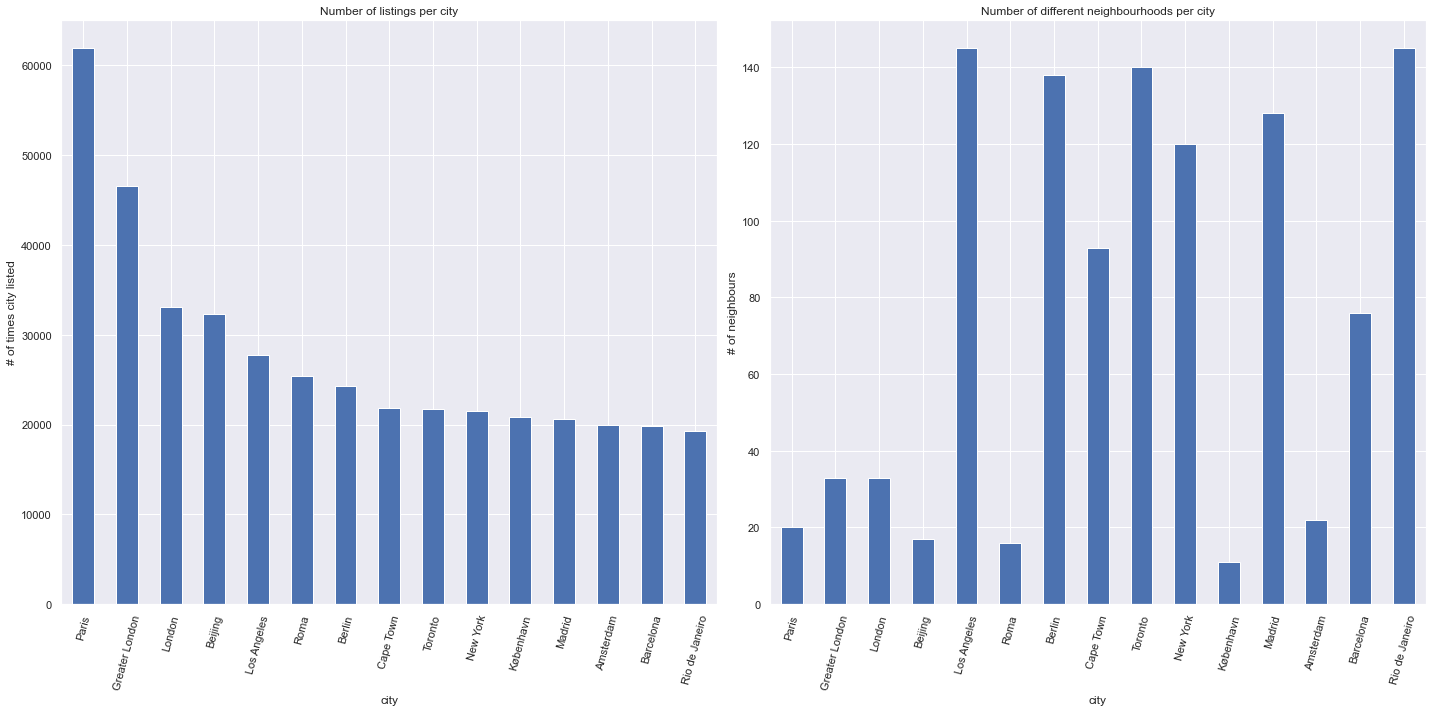

In [25]:
# your code goes here
df_top_15_cities = df_listings_analysis.select('id', 'neighbourhood_cleansed', 'city')\
                    .groupby('city')\
                    .agg(
                         F.count('id').alias('#listings'),
                         F.countDistinct('neighbourhood_cleansed').alias('#neighbourhoods')
                        ) \
                    .orderBy(F.desc("#listings"))\
                    .limit(15) \
                    .toPandas()

fig, axes = plt.subplots(1,2, figsize=(20,10), tight_layout=True)

df_top_15_cities.plot(kind='bar', x='city', y='#listings', ax=axes[0], rot=75, 
                      ylabel='# of times city listed', title="Number of listings per city",
                      legend=False );
df_top_15_cities.plot(kind='bar', x='city', y='#neighbourhoods', ax=axes[1], rot=75, 
                           ylabel='# of neighbours', title="Number of different neighbourhoods per city",
                      legend=False);

## Part 3: Price averages (5 pts)

Compute and visualise the average price of listings per city, restricted to the 15 cities having the most listings.

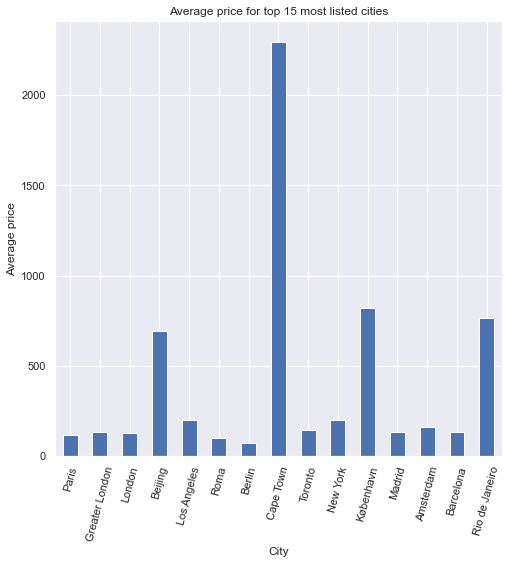

In [26]:
# your code goes here
df_city_agerage_prices = df_listings_analysis.select('id', 'price', 'city')\
                    .groupby('city')\
                    .agg(
                         F.count('id').alias('#listings'),
                         F.avg('price').alias('avg_price')
                        ) \
                    .orderBy(F.desc("#listings"))\
                    .limit(15) \
                    .toPandas() 
    
df_city_agerage_prices.plot(kind='bar', x='city', y='avg_price',  xlabel ='City', 
                            ylabel = 'Average price', rot=75,
                           title='Average price for top 15 most listed cities', 
                          figsize=(8,8), legend=False);

## Part 4: Value for money (5 pts)

The value of a listing is its rating divided by its price. The value of a city is the average value of its listings. 

Prices are only comparable when the local currency is the same. We'll therefore consider a subset of Euro-zone cities as defined in `eurozone_cities`.

Compute and visualise the value per city, restricted to the Euro-zone cities.

In [13]:
eurozone_cities = [
    'Paris', 'Roma', 'Berlin', 'Madrid', 'Amsterdam', 'Barcelona', 'Milano', 'Lisboa',
    'München', 'Wien', 'Lyon', 'Firenze', 'Porto', 'Napoli', 'Bordeaux', 'Venezia',
    'Málaga', 'Sevilla', 'València'
]

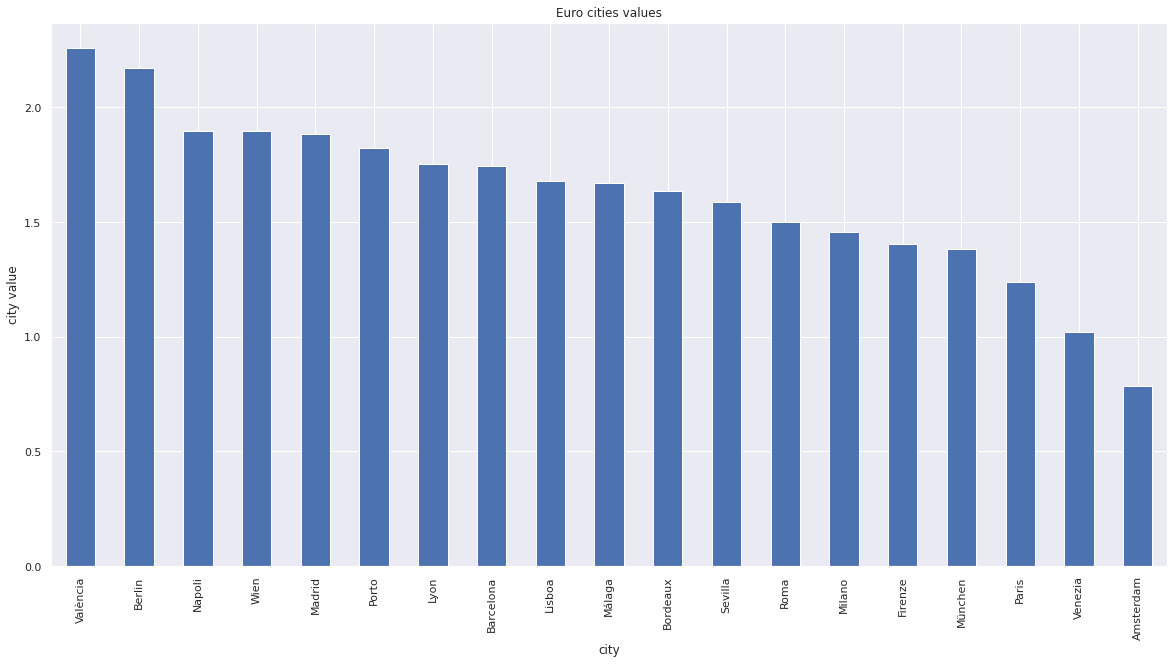

In [15]:
# your code goes 
df_values = df_listings_analysis.filter(F.col('city').isin(eurozone_cities)) \
                    .withColumn('value_listing',
                                df_listings_analysis.review_scores_rating / df_listings_analysis.price) \
                    .groupby('city')\
                    .agg(
                         F.avg('value_listing').alias('value_city')
                        )\
                    .orderBy('value_city', ascending=False) \
                    .toPandas()

# Plots
df_values.plot(kind='bar', x='city', y='value_city',  ylabel='city value', 
                              figsize=(20,10), title='Euro cities values', legend=False);

# Exercise 2: The case of London (30 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized). 
* You may need multiple queries to solve the individual parts.

Your dataframe is a subset of `df_listings_analysis` and should be named `df_listings_london`.

In [22]:
df_listings_london = df_listings_analysis.filter(F.lower(F.col('city')) == 'london')
df_listings_london.toPandas()

,id,price,property_type,review_scores_rating,neighbourhood_cleansed,city
0,11551,88.0,Apartment,92,Lambeth,London
1,15400,100.0,Apartment,96,Kensington and Chelsea,London
2,17402,300.0,Apartment,94,Westminster,London
3,24328,175.0,Townhouse,98,Wandsworth,London
4,31361,34.0,Townhouse,97,Newham,London
...,...,...,...,...,...,...
33173,38592036,75.0,House,None,Southwark,London
33174,38592739,160.0,Apartment,None,Kensington and Chelsea,London
33175,38593102,80.0,Apartment,None,Hammersmith and Fulham,London
33176,38593108,120.0,Apartment,None,Barnet,London


## Part 1: Price distribution (5 pts)

Compute and visualise the distribution of prices, for all prices up to and including the 95-percentile. Additionally, compute and visualise the distribution of prices, for all prices above the 95-percentile.

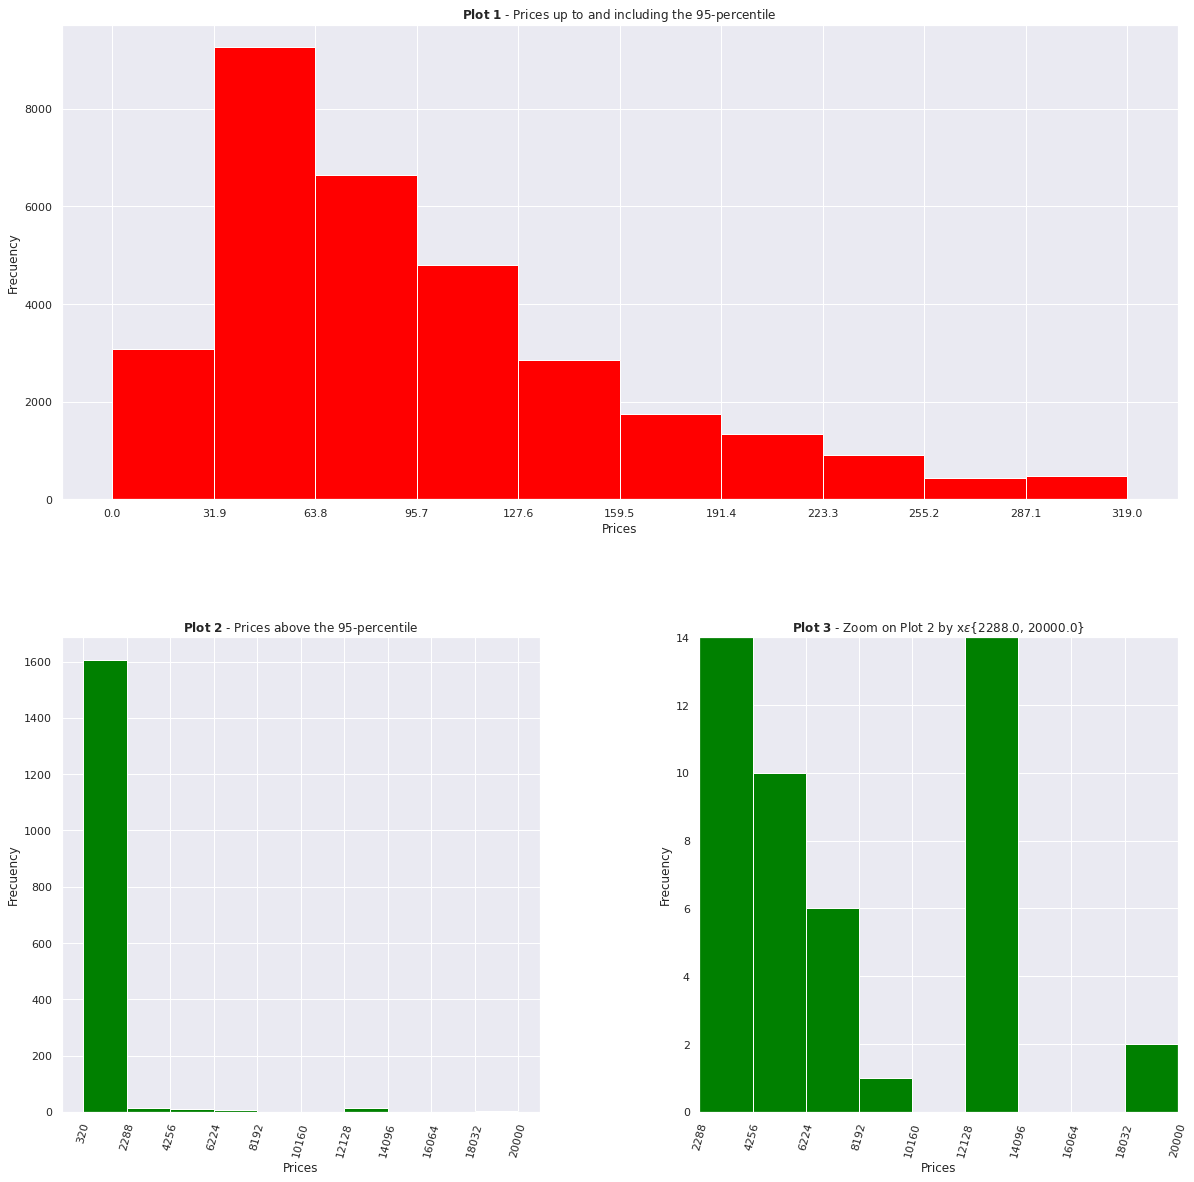

In [14]:
# your code goes here
p95 = df_listings_london.approxQuantile(col='price', probabilities=(0.95,), relativeError=0)[0]

# Apply filtering to get all data under 95% of total
df_prices_u95 = df_listings_london.select('price').filter(df_listings_london['price'] <= p95)

# Apply filtering to get all data above 95% of total
df_prices_o95 = df_listings_london.select('price').filter(df_listings_london['price'] > p95)

#Visualization
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(8, 4)

ax1 = fig.add_subplot(gs[:4, :])
# df_prices_u95.toPandas().hist(ax=ax1, color='red')
pu95 = np.array(df_prices_u95.collect()).reshape(-1,)
nu95, binsu95, _ = plt.hist(pu95, color='red')
plt.xticks(binsu95)
plt.ylabel('Frecuency')
plt.xlabel('Prices')
plt.title('$\mathbf{Plot \; 1}$ - Prices up to and including the 95-percentile')

ax2 = fig.add_subplot(gs[4:, :2])
# df_prices_o95.toPandas().hist(ax=ax2, color='green')
po95 = np.array(df_prices_o95.collect()).reshape(-1,)
no95, binso95, _ = plt.hist(po95, color='green')
plt.xticks(binso95, rotation=75)
plt.ylabel('Frecuency')
plt.xlabel('Prices')
plt.title(f'$\mathbf{{Plot \; 2}}$ - Prices above the 95-percentile')

ax3 = fig.add_subplot(gs[4:, 2:])
plt.title(f"$\mathbf{{Plot \; 3}}$ - Zoom on Plot 2 by x$\epsilon${{{binso95[1:].min()}, {binso95[1:].max()}}}")
plt.hist(po95, color='green')
plt.xlim(binso95[1:].min(), binso95[1:].max())
plt.ylim(no95[1:].min(), no95[1:].max())
plt.xticks(binso95[1:], rotation=75)
plt.ylabel('Frecuency')
plt.xlabel('Prices')

# some padding
fig.subplots_adjust(wspace=1, hspace=9)

## Part 2: Prices by type of property (5 pts)

Compute and visualise the average price and average rating per type of property, for property types with 75 or more listings. 

Your visualisation should be a single bar chart with two y-axes and two bars per property type. The x-axis should be ordered by average rating.

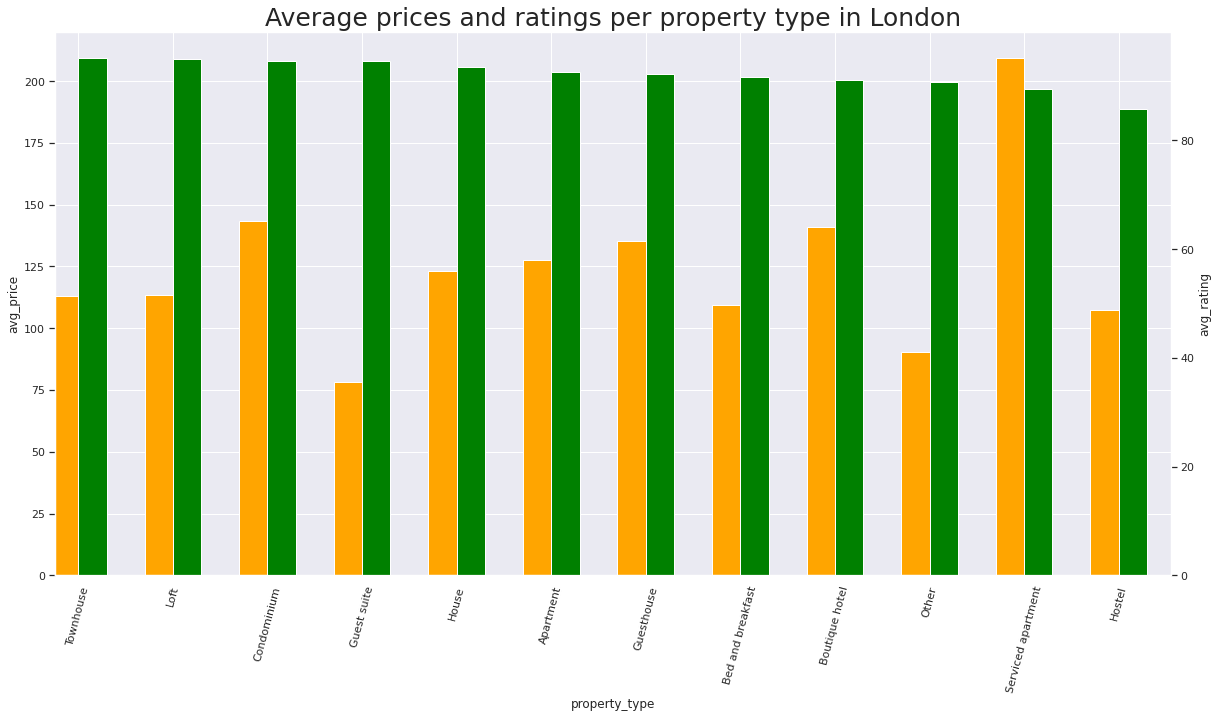

In [15]:
# your code goes here

london_properties = df_listings_london.groupby('property_type') \
                                            .agg(
                                                F.count('property_type').alias('property_type_count'),
                                                F.avg('price').alias('avg_price'),
                                                F.avg('review_scores_rating').alias('avg_rating')) \
                                            .filter(F.col('property_type_count') > 75) \
                                            .orderBy(F.col('avg_rating'), ascending=False) 


# Plots
fig, ax = plt.subplots(figsize=(20,10))

ax2 = ax.twinx() 

london_properties.toPandas().plot(kind='bar', x='property_type', y='avg_price', ylabel='avg_price', 
                                  ax=ax, color='orange', width=0.3, position=1, legend=False, rot=75)

london_properties.toPandas().plot(kind='bar', x='property_type', y='avg_rating', ylabel='avg_rating',
                                  color='green', ax=ax2, width=0.3, position=0, legend=False)

plt.title('Average prices and ratings per property type in London', fontsize=25 )

plt.grid(False)

## Part 3: Best offering in the neighbourhood (10 pts)

The value of a listing is its rating divided by its price. Compute and display a dataframe (with the columns you selected in Exercise 1 and those computed in this part) with the 3 highest valued listings in each neighbourhood, and having a value above 5. Make sure to use the `neighbourhood_cleansed` column in your computations.

Computing ranks based on value can be achieved using `pyspark.sql.window.Window`. This may produce equal ranks (i.e. when the value of two listings are the same).

Remember to use `pd.set_option('display.max_rows', <n>)` with appropriate `<n>` so all rows are displayed.

In [14]:
from pyspark.sql.window import Window

# your code goes here
df_neighbourhood = df_listings_analysis.filter(df_listings_analysis['city'].isin(eurozone_cities)) \
                                        .withColumn('value_listing', 
                                                    F.col('review_scores_rating') / F.col('price')) \
                                        .filter(F.col('value_listing') > 5)

# PySpark Window functions are used to calculate results such as the rank, 
# row number e.t.c over a range of input rows
windowSpec = Window.partitionBy("neighbourhood_cleansed") \
                            .orderBy(F.col("value_listing").desc())

# This function is used to get the rank of each row in the form of row numbers. 
# This is similar to rank() function, there is only one difference 
# the rank function leaves gaps in rank when there are ties.
df_neighbourhood = df_neighbourhood.withColumn("rank", F.dense_rank().over(windowSpec)) \
                                    .filter(F.col('rank') <= 3)

pd.set_option('display.max_rows', df_neighbourhood.count())

df_neighbourhood.toPandas()

,id,price,property_type,review_scores_rating,neighbourhood_cleansed,city,value_listing,rank
0,1858587,9.0,Apartment,93,1er Arrondissement,Lyon,10.333333,1
1,13410100,11.0,Apartment,90,1er Arrondissement,Lyon,8.181818,2
2,7878925,12.0,Apartment,98,1er Arrondissement,Lyon,8.166667,3
3,37245041,16.0,Apartment,100,2e Arrondissement,Lyon,6.250000,1
4,23087185,16.0,Apartment,95,2e Arrondissement,Lyon,5.937500,2
5,21362215,19.0,Apartment,100,2e Arrondissement,Lyon,5.263158,3
6,19549557,14.0,Apartment,100,3e Arrondissement,Lyon,7.142857,1
7,13332326,15.0,Apartment,100,3e Arrondissement,Lyon,6.666667,2
8,13411018,15.0,Apartment,100,3e Arrondissement,Lyon,6.666667,2
9,30217218,17.0,Townhouse,98,3e Arrondissement,Lyon,5.764706,3


## Part 4: Activity by month (5 pts)

Activity is given by the number of reviews received in a given time period. Compute and visualise the activity based on month, that is, the total number of reviews given in January, February, etc..

Your additional data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/reviews_london.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_reviews_london`.

In [26]:
df_reviews_london = load_csv_as_dataframe('reviews_london.csv')

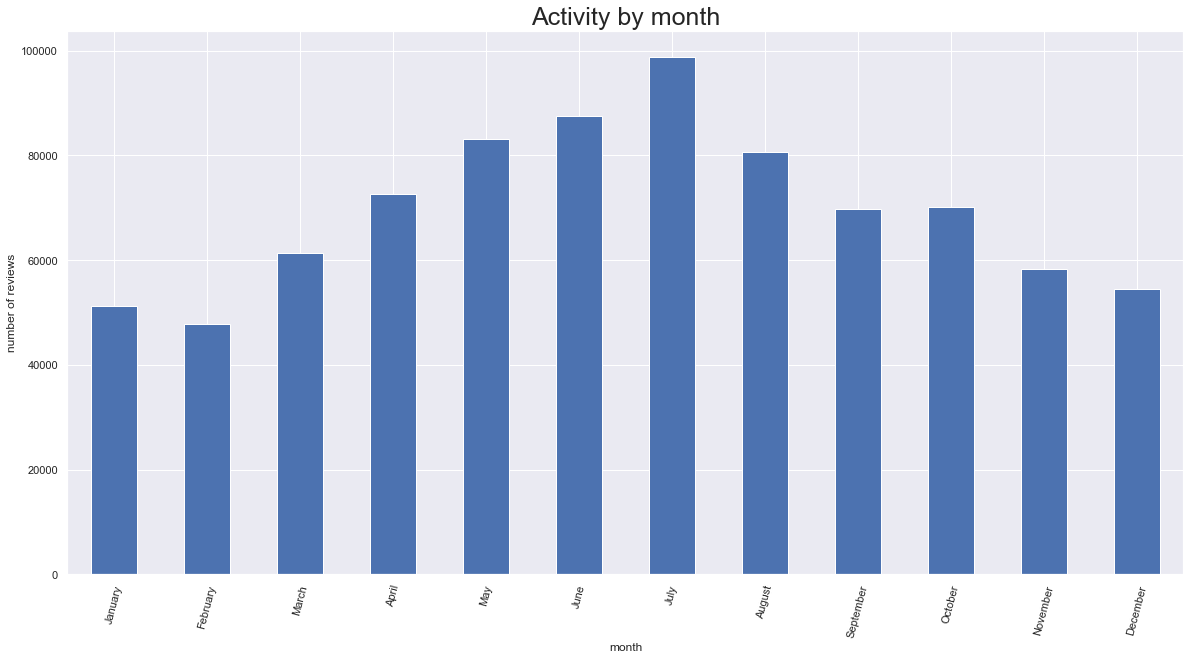

In [37]:
london_monthly_reviews = df_reviews_london.withColumn('month', F.month(F.col('date'))) \
                                    .groupBy('month') \
                                    .agg(F.count('id').alias('reviews_per_month')) \
                                    .orderBy(F.col('month'), ascending=True)

# Plots
month = np.array(london_monthly_reviews.select('month').collect()).reshape(-1, )
labels = [datetime.strptime(str(i), "%m").strftime('%B') for i in month]
london_monthly_reviews.toPandas() \
                      .plot(kind='bar', x='month', y='reviews_per_month', ylabel='number of reviews',
                            figsize=(20,10), legend=False)

plt.title('Activity by month', fontsize=25)
plt.xticks(ticks=range(0,12), labels=labels, rotation=75);

## Part 5: Reviews per listing (5 pts)

Each London listing has received 0 or more reviews. 

Display a dataframe showing 1) The number of listings, 2) The average number of reviews a listing receives, 3) The standard deviation of the reviews per listing distribution, 4) The minimum number of reviews any listing has received, and 5) The maximum number of reviews any listing has received.

In [23]:
# your code goes here

df_reviews_ids = df_reviews_london.select(F.col('listing_id'), F.col('id').alias('id_review'))
df_listing_reviews = df_listings_london\
                        .join(df_reviews_ids, df_listings_london.id==df_reviews_ids.listing_id, how='left')

df_listing_reviews.groupby('id') \
      .agg(F.count('listing_id').alias('count_listings')) \
      .describe('count_listings') \
      .toPandas()

,summary,count_listings
0,count,33178
1,mean,10.425733920067515
2,stddev,32.71495258665468
3,min,0
4,max,690


# Exercise 3: Word sentiment (45 pts)

In this exercise you must use Spark to do the data processing. For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. You may need multiple queries to solve the individual parts.

The goal here is to determine what sentiment (positive or negative) words in reviews have. Roughly speaking, we want each word to be assigned a score based on the rating of the reviews in which the word occurs in the review comment. We'd expect words such as "clean", "comfortable", "superhost" to receive high scores, while words such as "unpleasant", "dirty", "disgusting" would receive low scores.

As individual reviews do not have a rating, we'll consider the rating of individual reviews to be the rating of its related listing (i.e. assuming each review gave the average rating (`review_scores_rating`) of the listing). 

The score of a word is given by the mean review rating over the reviews in which that word occurs in the comment. We require words to appear in at least 0.5% (1 in 200) listings, and to be at least 4 characters, for it to have a defined score.

Formally, when a word $w$ occurs in at least $0.5\%$ of listings and $|w| > 3$, its score is

$
\begin{align*}
score(w) = \frac{1}{|C_w|}\sum_{comment \in C_w} \text{review_rating}(comment)
\end{align*}
$
, where 
* $C_w = \{comment \mid w \text{ occurs in } \text{clean_text}(comment)\}$, the set (so no duplicates) of comments in which $w$ occurs, and
* $\text{clean_text}(comment)$ is the result of your `clean_text` function defined below, and
* $\text{review_rating}(comment)$ is the `review_scores_rating` of the listing which this $comment$ is related to.


## Part 1: Toy data (15 pts)

To get started we'll consider a toy example where the input is `df_sentiment_listings_toy` and `df_sentiment_reviews_toy` defined in the next code cell. You should provide an implementation of `calculate_word_scores_toy` in the subsequent code cell. Your implementation should result in a query that when given the toy example dataframes as input and is materialized with `toPandas()` produces this table:

|    | word   |   word_score |   listing_occurences |   word_occurences |   comment_occurences |
|---:|:-------|-------------:|---------------------:|------------------:|---------------------:|
|  0 | aaaa   |      7       |                    3 |                 5 |                    5 |
|  1 | bbbb   |      6.66667 |                    2 |                 3 |                    3 |
|  2 | eeee   |      0       |                    1 |                 1 |                    1 |
|  3 | dddd   |      5       |                    1 |                 1 |                    1 |
|  4 | cccc   |      5       |                    2 |                 2 |                    2 |'

Observe that `word_occurences` and `comment_occurences` are the same as words occuring multiple times in a comment are counted once, and that `clean_text` is used to ignore casing and discard non-words. Additionally, any word occuring at least once will occur in more than 1 out of 200 listings on this toy data.

In [23]:
from pyspark.sql.types import StructType, StructField, StringType

schema_listings = StructType([
    StructField('id', StringType(), True),
    StructField('review_scores_rating', StringType(), True),
])
data_listings = [
    {'id': '0', 'review_scores_rating': '10'},
    {'id': '1', 'review_scores_rating': '5'},
    {'id': '2', 'review_scores_rating': '0'},
]
df_sentiment_listings_toy = spark.createDataFrame(data_listings, schema_listings)

schema_reviews = StructType([
    StructField('listing_id', StringType(), True),
    StructField('id', StringType(), True),
    StructField('comments', StringType(), True),
])
data_reviews = [
    {'listing_id': '0', 'id': '100', 'comments': 'aaaa bbbb          cccc'},
    {'listing_id': '0', 'id': '101', 'comments': 'aaaa bbbb '},
    {'listing_id': '0', 'id': '102', 'comments': 'aaaa aAAa          aaaa'},
    {'listing_id': '1', 'id': '103', 'comments': 'Aaaa bbb ccc'},
    {'listing_id': '1', 'id': '104', 'comments': 'dddd %ˆ&*'},
    {'listing_id': '2', 'id': '105', 'comments': 'AaaA'},
    {'listing_id': '2', 'id': '106', 'comments': 'bbbb ccc e&eˆˆee'},
    {'listing_id': '2', 'id': '107', 'comments': 'cccc cccc'},
]

df_sentiment_reviews_toy = \
    spark.createDataFrame(data_reviews, schema_reviews) \
        .select(F.col('listing_id'), F.col('id').alias('comment_id'), F.col('comments'))

In [29]:
# your code goes here
def clean_text(col):
    """
        Cleans the text (comment) associated with col. The
        cleaning should:
            1) Lower case the text
            2) Turn multiple whitespaces into single whitespaces
            3) Remove anything but letters, digits and whitespaces
        
        :col: A Spark Column object containing text data
        :returns: A Spark Column object.
    """

    col = F.lower(col)
    reg_exp = "\\s+"
    col = F.regexp_replace(col, reg_exp," ") 
    col = F.regexp_replace(col, "[^A-Za-z0-9\s]", "")
    col = F.trim(col) 

    return col
    raise NotImplementedError

    
#NOTE: Sort by word alhpabetically
def calculate_word_scores_toy(df_list, df_rev):     
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The table produced should have the 
        same columns as specified in part 1.
        
        :returns: A pandas DataFrame
    """

    df_scores = df_rev \
                     .withColumn('comments', clean_text('comments')) \
                     .withColumn('comments', F.split('comments', ' ')) \
                     .withColumn('comments', F.concat_ws(' ', F.array_distinct('comments'))) \
                     .join(df_list, df_rev.listing_id == df_list.id) \
                     .select(
                        F.explode(F.split(F.col('comments'), ' ')).alias('word'),
                        F.col('review_scores_rating'),
                        F.col('comment_id'),
                        F.col('listing_id'),
                        F.col('comments')) \
                     .filter(F.length('word') > 3) \
                     .groupBy('word') \
                     .agg(
                        F.mean('review_scores_rating').alias('word_score'),
                        F.countDistinct('listing_id').alias('listing_occurences'),
                        F.count('word').alias('word_occurences'),
                        F.count('comment_id').alias('comment_occurences')
                     ) \
                     .orderBy(F.asc('word')).toPandas() 
    
    return df_scores
    raise NotImplementedError

## Part 2: London comments (15 pts)

In this part we'll calculate word scores for the comments related to London listings only. You should implement `count_relevant_listings` and `calculate_word_scores` (it will be an extension of your function from part 1) below. See the mathematical definition and docstrings for intended behaviour.

The function `calculate_word_scores` should return the top 10 and bottom 10 words by score. You should **not** use caching in your function.

Make sure your satisfy all conditions for a word to be scored (e.g. correctly calculating how many total listings scores are computed over). You should also consider whether your query is optimally structured in terms of computation time. Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all words.

In [24]:
# your code goes here
def count_relevant_listings(df_list, df_rev):
    """
        Calculates the number of listings in df_list that has a 
        review in df_rev. A listing that is reviewed more than once
        should only count as one.
        
        :returns: An integer 
    """
    
    num = df_list.join(df_rev, df_list.id == df_rev.listing_id) \
                  .select(df_list.id) \
                  .distinct() \
                  .count()
    
    return num
    raise NotImplementedError


def calculate_word_scores(df_list, df_rev, listings_count):
    """
        Calculates the word score over listings in df_list and reviews in df_rev. 
        The value of listings_count should  be used to filter out words not occuring frequently enough in comments. 
        The table produced should have the same columns as in part 1 of this exercise.
        :returns: A pandas DataFrame containing the top 10 and 
        bottom 10 words based on their word score, sorted by word_score.
    """
    df_list = df_list.select(F.col('id'), F.col('review_scores_rating')) \
                     .filter(F.col('review_scores_rating').isNotNull())
                             
    df_rev = df_rev.select(F.col('listing_id'), F.col('id').alias('comment_id'),
                           F.col('comments'))
    
    df_scores = df_rev \
                     .withColumn('comments', clean_text('comments')) \
                     .withColumn('comments', F.split('comments', ' ')) \
                     .withColumn('comments', F.concat_ws(' ', F.array_distinct('comments'))) \
                     .join(df_list, df_rev.listing_id == df_list.id) \
                     .select(
                        F.explode(F.split('comments', ' ')).alias('word'),
                        F.col('review_scores_rating'),
                        F.col('comment_id'),
                        F.col('listing_id'),
                        F.col('comments')) \
                     .filter(F.length('word') > 3) \
                     .groupBy('word') \
                     .agg(
                        F.mean('review_scores_rating').alias('word_score'),
                        F.countDistinct('listing_id').alias('listing_occurences'),
                        F.count('word').alias('word_occurences'),
                        F.count('comment_id').alias('comment_occurences')
                     ) \
                     .orderBy(F.asc('word_score')) \
                     .filter(F.col('listing_occurences') > listings_count * 0.005)

    
    return df_scores.orderBy(F.desc('word_score')).limit(10) \
                       .union(df_scores.orderBy(F.asc('word_score')).limit(10)).toPandas()

    raise NotImplementedError

In [30]:
# should not be modified
from IPython.display import display

relevant_listings_count_london = count_relevant_listings(df_listings_london, df_reviews_london)
word_scores_london_timing = %timeit -o -n1 -r1 display( \
    calculate_word_scores(df_listings_london, \
                          df_reviews_london, \
                          relevant_listings_count_london) \
)

word_scores_london_timing.best

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,granola,97.553279,153,244,244
1,homemade,97.267500,474,1200,1200
2,superhost,97.057178,687,822,822
3,yogurt,97.054264,245,387,387
4,yoghurt,97.037037,146,216,216
5,baked,96.942593,296,540,540
6,muesli,96.897727,180,264,264
7,lovelier,96.863636,130,132,132
8,divine,96.800000,164,180,180
9,jane,96.747204,131,1788,1788


1min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


104.66497310000005

## Part 3: Scalability (10 pts)

The listings from London make up a little less than 2% of the entire set of listings. In this part we're interested in how the amount of input data impacts computation time, that is, how `calculate_word_scores` scales as data increases. To this end, we've made multiple samples of the dataset of varying sizes.

The experiment reuses `count_relevant_listings` and `calculate_word_scores` that you implemented in part 2. Code needed for this part is provided to you. 

Your task is to obtain the data sources, run the code cells below, and explain the results you get. Specifically, you must explain any non-linear relationship between data size and computation time, using the markdown cell at the end of this part. In finding explanations, using the Spark UI to investigate the anatomy of your queries may prove valuable. Once you've found an explanation, state a potential solution to remedy the issue. Lastly, include a paragraph stating the specifications of your computer hardware (memory, CPU cores and clock speed, solid state disk or not) on which the experiment has been run.

*Implementation note* Make sure you've properly configured `spark.driver.memory` (it requires a kernel restart to update the value). It may be that your query fails on the larger samples due to running out of compute resources. This is likely caused by a suboptimal `calculate_word_scores`, but can be from reaching the limits of your hardware. If you think the latter is the case, argue for this perspective in the markdown cell.

Your data sources are (uncompress and place in the same directory as this notebook):
* 0.25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-25percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-25percent.csv.zip)
* 0.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-5percent.csv.zip)
* 1%: [listings](https://data-download.compute.dtu.dk/c02807/listings_1-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_1-dot-0percent.csv.zip)
* 2%: [listings](https://data-download.compute.dtu.dk/c02807/listings_2-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_2-dot-0percent.csv.zip)
* 4%: [listings](https://data-download.compute.dtu.dk/c02807/listings_4-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_4-dot-0percent.csv.zip)
* 8%: [listings](https://data-download.compute.dtu.dk/c02807/listings_8-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_8-dot-0percent.csv.zip)
* 12.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_12-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_12-dot-5percent.csv.zip)
* 16%: [listings](https://data-download.compute.dtu.dk/c02807/listings_16-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_16-dot-0percent.csv.zip)
* 25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_25-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_25-dot-0percent.csv.zip)
* 50%: [listings](https://data-download.compute.dtu.dk/c02807/listings_50-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_50-dot-0percent.csv.zip)
* 75%: [listings](https://data-download.compute.dtu.dk/c02807/listings_75-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_75-dot-0percent.csv.zip)
* 100%: [listings](https://data-download.compute.dtu.dk/c02807/listings_100-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_100-dot-0percent.csv.zip)

In [27]:
import time
def calculate_word_scores_timed(percent_str):
    """
        Calculates word scores over a sampled dataset indicated
        by percent_str.
        
        :returns: A dictionary with benchmarking information and
        the calculated values.
    """
    df_listings = load_csv_as_dataframe(f'listings_{percent_str}percent.csv')
    df_reviews = load_csv_as_dataframe(f'reviews_{percent_str}percent.csv')
    
    listings_count = count_relevant_listings(df_listings, df_reviews)

    start = time.time()
    df_word_scores = calculate_word_scores(df_listings, df_reviews, listings_count)
    end = time.time()
    return {
        'percentage': float(percent_str.replace('-dot-', '.')), 
        'time_spent': f"{end - start:.2f}", 
        'relevant_listings': listings_count, 
        'df': df_word_scores
    }

In [28]:
data_percentages = [
    '0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0',
    '12-dot-5', '16-dot-0', '25-dot-0'
]
score_data = {
    percentage_str: calculate_word_scores_timed(percentage_str) for percentage_str in data_percentages
}

In [29]:
score_data['50-dot-0'] = calculate_word_scores_timed('50-dot-0')

In [31]:
score_data['75-dot-0'] = calculate_word_scores_timed('75-dot-0')

In [33]:
score_data['100-dot-0'] = calculate_word_scores_timed('100-dot-0')

In [40]:
df_scores_scaling = pd.DataFrame(score_data).T.convert_dtypes()
df_scores_scaling.time_spent = df_scores_scaling.time_spent.astype(float)

# Access to word scores of 2 percent data: df_scores_scaling.loc['2-dot-0'].df
df_scores_scaling = df_scores_scaling
df_scores_scaling

,percentage,time_spent,relevant_listings,df
0-dot-25,0.25,14.12,2529,word word_score listing_occurences ...
0-dot-5,0.5,19.13,5040,word word_score listing_occure...
1-dot-0,1.0,35.86,10143,word word_score listing_occurence...
2-dot-0,2.0,68.28,20575,word word_score listing_occurences...
4-dot-0,4.0,137.81,40919,word word_score listing_occure...
8-dot-0,8.0,247.49,81756,word word_score listing_occure...
12-dot-5,12.5,402.20,128202,word word_score listing_occure...
16-dot-0,16.0,508.75,163627,word word_score listing_occure...
25-dot-0,25.0,775.67,256183,word word_score listing_occure...
50-dot-0,50.0,1536.63,511667,word word_score listing_occure...


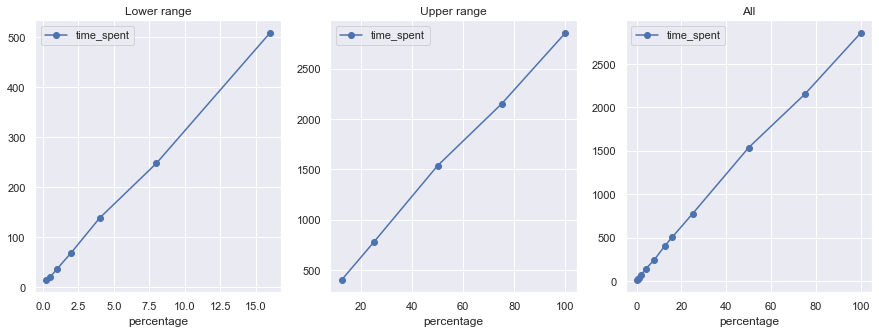

In [41]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

lower_range = ['0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0', '16-dot-0']
df_scores_scaling[df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[0], style='-o', title='Lower range')
df_scores_scaling[~df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[1], style='-o', title='Upper range')
_ = df_scores_scaling \
    .plot.line(x='percentage', y='time_spent', ax=axes[2], style='-o', title='All')

We can see a non linear relationship in the transition between for sample **8-dot-0** and **50-dot-0**. This is due to the fact that Spark changes its operations flows, as it follows:

<p>
<center><b>Sample '8-dot-0': 1st non-linear relationship</center></b>
<p>

We have noticed the following:
- for **Sample '4-dot-0'**: Spark scans the 2 files, does the WholeStageCodegen for each and filters them. For the reviews, it creates a Project, whereas for  the listings it does an BroadcastExchange. Then, it does a *BroadcastHashJoin*, and continues the operations.


- for **Sample '8-dot-0'**, the opperations are **different**:
	- for **Reviews**, it does the following: scan CSV -> WholeStageCodegen -> filter -> Spark does a Project ->   Exchange -> AQEShuffleRead
	- For **Listings** it scans the CSV, -> does WholeStageCodegen -> filtering,-> Exchange -> AQEShuffleRead -> BroadcastExchange
	- After *AQEShuffleRead* has been done on **Reviews**, and *BroadcastExchange* on **Listings**, it does on **both 8.0 and 4.0** WholeStageCodeGen and *BroadcastHashJoin* on both -> Project -> Generate -> Filter -> Project -> HashAggregate.
	- From this point, Spark again creates 2 different **paths for the 2 samples**
	- For **4-dot-0**: Does Exchange -> AqeShuffleRead -> HashAggreagate 2x times
	- For **8-dot-0:** does HashAggreagate 2x times directly
	- After the 2 *HashAggreagates*, it does the **same for both samples**: Exchange -> parallelize in 2 AQEShuffleRead -> HashAggregate (WholeStageCodegen) -> Filter -> Take OrderAndProject -> Union -> AdaptiveSpark Plan
    
    
**In short, we have noticed some extra stages for Sample 8-dot-0 (Exchange, AQEShuffleRead), as the BroadcastHashJoin could not be employed in the same manner as for the smaller data sets, due to the fact that the *list* sample surpasses the limit of autoBroadcastJoinThreshold** 
 
*NOTE*: **BroadCastHashjoin** is engaged when 2 data sets, one small and one large have to be joined. With the help of a broadcast variable, the smaller data frame is broadcasted by the driver to all Spark executors and, and then joined with the larger data set on each executor

 the autoBroadcastJoinThreshold property being set by default to 10mb.
    
*NOTE*: **autoBroadcastJoinThreshold** configures the maximum size in bytes for a table that will be broadcasted to all worker nodes when performing a join. With the help of a broadcast variable, the smaller data is broadcasted by the driver to all Spark executors and, and then joined with the larger data set on each executor


*NOTE*: **BroadCastHashjoin** is the easiest and fastest join offered by Spark, since it does not involve any shuffle of the data set; all the data is available locally to the executor after a broadcast. One just has to be sure that there is enough memory both on the Spark driver's and the executors' side, to hold the smaller data set in memory|


<p>
<center><b>Sample '50-dot-0': 2nd non-linear relationship</center></b>
<p>
    

<center><b> Second non-linear relationship</b></center>
The 2nd nonlinear relationship happens for sample **50-dot-0**. This is because Spark uses here a *SortMergeJoin* joining strategy to join the 50-dot-0 data frames, whereas for **25-dot-0** it uses a *BroadCastHashJoin* strategy, hence a change in the slope's angle, as it influences the computing time performance.


**Potential Solutions**
- We could **raise up the limit for autoBroadcastJoinThreshold**, in order to match up bigger tables as by default it is set to 10 mb
- One solution would be to to sort the tables by the common key columns (df_rev by listing_id and df_list by id), then bucket them in parquets, as spark managed tables. After the 2 tables are sorted by the joining columns, there will be no more need to sort during the sortMergeJoin. It will be possible to skip the exchange and go straight to WholeStageCodegen. We can eliminate the Exchange step from this scheme if we create partitioned buckets for common sorted keys or columns on which we want to perform frequent equijoins. So, we can create an explicit number of buckets to store specific sorted columns (one key per bucket). **Presorting and reorganizing data in this way boosts performance, as it allows us to skip the expensive Exchange operation and go straight to WholeStageCodegen**
- We could also call the method broadcast() on the listing sample, as this would force Spark to do a BroadcastHashJoin
- One of the things we have noticed is that not all stages have enough task. There are stages with unbalanced number of tasks. So, we could increase the number of tasks with Default parallelism (*NOTE:* Default parallelism states the number of cores available to the application at any given time. In short, we need to increase the degree of paralelism that we bring to the application. Since **spark.default.paralelism** controls how many initial partitions we use, a good rule of thumb would be to set it twice the number of cores, as this would  incerase the number of tasks that spark is going to work on


**Computer specifications**:
- 8 GB RAM
- Clock speed: 2.5 GHz
- SSD
- 2 x cores


## Part 4: Robustness (5 pts)

In this part we'll explore robustness of our word scores, using the values we computed in part 3. We'll do so by comparing top/bottom words for three different samples of the dataset. Specifically, the scores from your maximum (e.g. 100%) computed sample are to be compared with the 12.5% and 2.0% scores.

Compute and display a dataframe that accounts for any word found in either of the three samples' top/bottom words, and additionally shows the related `word_score` and `word_occurences` values.

Note that `df_scores_scaling.loc['100-dot-0'].df` provides the word scores dataframe of the 100% sample (similarly for the other two). For this part you should rely on pandas functionality only.  Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all rows.

In [43]:
# your code goes here

score_data_2_dot_0 = score_data['2-dot-0'].get('df')[['word', 'word_score', 'word_occurences']]
score_data_12_dot_5 = score_data['12-dot-5'].get('df')[['word', 'word_score', 'word_occurences']]
score_data_100_dot_0 = score_data['100-dot-0'].get('df')[['word', 'word_score', 'word_occurences']]

result = score_data_2_dot_0.merge(score_data_12_dot_5, on='word', how='inner', suffixes=['_2_dot_0', '_12_dot_5']) \
                  .merge(score_data_100_dot_0, on='word', how='inner') \
                  .rename(columns={"word_score": "word_score_100_dot_0", 
                                   "word_occurences": "word_occurences_100_dot_0"}, errors="raise")

pd.set_option('display.max_rows', len(result))
result

,word,word_score_2_dot_0,word_occurences_2_dot_0,word_score_12_dot_5,word_occurences_12_dot_5,word_score_100_dot_0,word_occurences_100_dot_0
0,homemade,97.548554,968,97.343706,5688,97.361154,43589
1,nashville,97.457931,2175,97.658064,15383,97.516548,115904
2,filthy,86.486842,152,87.087349,996,86.981529,8229
3,disgusting,86.681818,132,87.112832,904,86.471110,7217
4,sucio,87.189189,111,85.547074,786,86.248298,6170
5,worst,87.743961,414,87.811107,2647,87.823516,21509
6,dirty,88.275956,1830,88.495156,10528,88.319884,86153
7,mold,88.355491,346,88.462145,1902,88.305516,15973


# Exercise 4: Transactions analysis (55 pts)

In this exercise the goal is to analyse historical business transactions (sales of parts to other companies), and derive insights about both products and customers.

The company X produces and globally sells gadget parts to a number of other companies. You requested the sales department of X to provide you with access to the customer and sales transactions database. To your horror, you've found no such database exists, but the data is instead manually maintained in a spreadsheet (error-prone solution). Intrepid as you are, you've accepted to receive the spreadsheet data as a `.csv`, realizing already data cleaning will be necessary.

Your first step (parts 1 and 2) is to clean the data after which you will derive insights about X's business operations (parts 3 and 4).

The input data is available here: [transactions.csv](http://courses.compute.dtu.dk/02807/2021/projects/project2/transactions.csv)

**Using SQL**

In this final exercise you must write SQL to do the data processing in parts 3 and 4. This entails using `psql.sqldf` to execute your queries (up against `df_transactions_cleaned`) which will return a pandas dataframe. Each question should be answered with a *single* query. For visualisation the `psql.sqldf` call should be followed only by functions necessary to customize the plotting/layout steps or reshape the dataframe (i.e. no data processing take place after your SQL statement is materialized as a pandas dataframe).

In part 1 and 2 of this exercise, you should make use of pandas functionality.



## Part 1: Data cleaning (15 pts)

For each column in the dataframe, investigate and **correct** problematic aspects such as,
* Missing values: Insert meaningful values (data imputation). Detectable as `np.nan`'s. A typical value for imputation is the *mode* (most frequent value) of the distribution. If no proper data imputation is possible, you may resort to dropping rows.
* Incorrect values: Typos and other data mishaps are present as values are manually entered. Detectable as low-prevalence categorical values, or ambigious data links (e.g. company listed in multiple countries). If no proper value correction is possible, you may resort to dropping rows.

In both cases, your strategy for replacing values should be data-driven, that is, shaped by the patterns you observe in the data. It is allowed to skip correcting the data (and instead drop the rows) if few rows are improved by your corrections. If in doubt, do the correction.

After all your cleaning steps are completed, you should run the `PandasProfiler` on your cleaned dataset, which should now contain 0% missing cells. Lastly, summarize the issues you identified and how you addressed them.

### Read, profile and explain

As the first step, load the data naming the dataframe `df_transactions`, and make a copy named `df_transactions_cleaned` on which your data cleaning steps will be done. Establish an overview using `PandasProfiler` (but realize there's more to cleaning than what this tool will let you know). Write a paragraph on what the data is about (e.g. what does a row constitute), and a paragraph on what the profile report tells you.

In [61]:
# your code goes here
df_transactions = pd.read_csv('transactions.csv')

In [62]:
df_transactions_cleaned = df_transactions.copy(deep = True)
df_transactions_cleaned.head()

,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55


In [63]:
profile = ProfileReport(df_transactions, title="Transactions dataset", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Your explanation here*

<center><b>What the data is about</b></center>

The table contains the attributes describing transactions:
- information about the part sold (as a code)
- the company that bought it
- country of the buyer company
- city of buyer company
- price of transaction
- date of transaction

<center><b>Information obtained from the Profile Report </b></center>

     
The Profiler Report made us see that in total there are:
- 6 attributes 
- **20568 rows** 
- 1.8% Missing cells in total
- 0 duplicate rows 

Columns are described as it follows:
- **country** col(categorical):
    - 2171 missing values (18397 rows containing values) 
    - 13 distinct values
    - 21165 uppercase letters
    - Mode Portugal: 
- **company** col has 0 missing values and 35 distinct values
    - 2 x '.' values
    - 1 x '0' value
    - 2 x ' ' value
    - 1 x '-' value
- **city** col has **33 missing values** and 30 distinct values
- **part** col has 10 missing values
- **price** col: 
    - **1 missing value** (marked as '-' ???) 
    - €, £, $, ¥ are the monetary units being used for only 20553 values -> CLEAN
    - Some prices are in lowercase letters ??
    - Only '.' is used for decimals
    - 20567 values, out of which 20557 have the '.' symbol????
    - Dash punctation (Value '-') is used 78 times -> CLEAN
    - Letters present: 'n' x 3 , 'a' x 3, 'v' x 2, 'o' x 2, 'i' x 2, 'd' x 2 -> CLEAN
- **date** col has 0 missing values


### Country column

There are around **10.6%** missing values in Country column. We will apply the following algorithm to find the missing country of an observation from the city attribute of the same observation.

In order to infer the country, we will use the following algorithm:
- trim the df and keep only city and country
- drop rows where city is NAN
- make a df dict to map country to city to obseve irregularities in the country names
- clean irregularities
- make a dictionary that maps each city to a country
- replace empty country entries based on the dictionary that maps city to country

In [64]:
# your code goes here

# trim the df (keep only city and country) and drop rows where city is NAN
df_geo = df_transactions_cleaned[['country', 'city']]
df_geo = df_geo[~df_geo['city'].isnull()]
df_geo

,country,city
0,Spain,Barcelona
1,Greece,Thessaloniki
2,Greece,Athens
3,France,Annecy
...,...,...
20564,Portugal,Amadora\t
20565,Portugal,Braga
20566,Greece,Athens
20567,Greece,Athens


In [65]:
# map city-country
df_cities_mapped = df_geo.groupby('country')['city'].apply(set).to_frame().reset_index()
print('Shape df city-country map', df_cities_mapped.shape)
df_cities_mapped

Shape df city-country map (13, 2)


,country,city
0,France,"{Lyon, Annecy, Arcueil, Champagnole, Paris, Am..."
1,Germany,{Düsseldorf}
2,Greece,"{Heraklion, Thessaloniki, Athens, Patras}"
3,Japan,"{Niihama, Asaka}"
...,...,...
9,Tyskland,{Düsseldorf}
10,US,{Boston}
11,United Kingdom,{London}
12,United States,"{New York, Boston}"


DUPLICATES: (Tyskland = Germany), (US = United States), (Portuga = Portugal)

In [66]:
df_transactions_cleaned['country'] = df_transactions_cleaned['country']\
                                    .replace({'US': 'United States', 
                                              'Tyskland': 'Germany',
                                              'Portuga': 'Portugal'})

df_geo = df_transactions_cleaned[['country', 'city']]
dictcity2country = df_geo.set_index('city').to_dict(orient='dict')['country']
dictcity2country

{'Barcelona': 'Spain',
 'Thessaloniki': 'Greece',
 'Athens': 'Greece',
 'Annecy': 'France',
 'Paris': 'France',
 'Düsseldorf': 'Germany',
 'London': 'United Kingdom',
 'Braga': 'Portugal',
 'Nanterre': 'France',
 'Amadora\t': 'Portugal',
 'New York': 'United States',
 'Arnhem': 'Netherlands',
 'Nice': 'France',
 'Lisbon': 'Portugal',
 'Amsterdam': 'Netherlands',
 'Porto': 'Portugal',
 'Boston': 'United States',
 'Niihama': 'Japan',
 'Almada': 'Portugal',
 'Aranhas': 'Portugal',
 'Heraklion': 'Greece',
 'Amiens': 'France',
 'Patras': 'Greece',
 'Arcueil': 'France',
 'Lyon': 'France',
 'Asaka': 'Japan',
 'Champagnole': 'France',
 'Zürich': 'Switzerland',
 nan: nan,
 'Monção': 'Portugal',
 'Vila Fria': 'Portugal'}

In [67]:
df_transactions_cleaned['country'] = df_transactions_cleaned['country'] \
                                        .fillna(df_transactions_cleaned['city'] \
                                        .apply(lambda x: dictcity2country[x]))

count = df_transactions_cleaned['country'].isna().sum()
print('There are', count, 'empty entries left in the attrbutte country.')

There are 30 empty entries left in the attrbutte country.


This is because there are observations where both country and city entries are missing so we cannot estimate country based on the city. Here we display the portion of the df that contains nan both in country and city to verify this observation.

In [68]:
df_ccnulls = df_transactions_cleaned[(df_transactions_cleaned['city'].isnull()) & \
                                     (df_transactions_cleaned['country'].isnull())]
display(df_ccnulls)

print('The percentage of the non-restored observations is', len(df_ccnulls) / len(df_transactions_cleaned) *100, 
      'out of the total missing values for the attribute country.')

,part,company,country,city,price,date
12820,50563-113,Ntags,NaN,NaN,507.49€,2017-10-20 04:03:11
12821,55154-5057,Brainsphere,NaN,NaN,421.64€,2017-10-20 13:23:34
12822,36987-1697,Ntags,NaN,NaN,937.08€,2017-10-20 18:25:00
12823,68462-565,Thoughtmix,NaN,NaN,777.58€,2017-10-20 21:21:18
...,...,...,...,...,...,...
16148,51346-126,Kanoodle,NaN,NaN,¥15949.24,2018-04-26 16:21:00
16149,49348-574,Thoughtmix,NaN,NaN,295.01€,2018-04-26 19:16:45
16150,0228-2167,Zooxo,NaN,NaN,£682.83,2018-04-26 22:20:00
16151,13537-259,Thoughtmix,NaN,NaN,865.37€,2018-04-26 22:34:15


The percentage of the non-restored observations is 0.14585764294049008 out of the total missing values for the attribute country.


1. Remove `NaN` values that are in **both** country and city
2. Check for `NaN` values **just** in City and then inferred with the country


In [69]:
count = df_transactions_cleaned['city'].isna().sum()
print('Empty entries left in the city attribute:', count)

df_transactions_cleaned = df_transactions_cleaned[~(df_transactions_cleaned['city'].isnull() & \
                                                    df_transactions_cleaned['country'].isnull())]
 

count = df_transactions_cleaned['city'].isna().sum()
print('There are', count, 'empty entries left in the attribute city.')

Empty entries left in the city attribute: 33
There are 3 empty entries left in the attribute city.


### Company column

In [70]:
df_transactions_cleaned.groupby("company")["company"].count()

company
 -                1
 a                1
Avaveo          212
Brainsphere    1240
               ... 
Zoonder         453
Zooxo          1667
Zooxo.            2
aa                1
Name: company, Length: 35, dtype: int64

**Correcting values**
**We have noticed some typos:**
- Zooxo - x1509
- Zooxo. - x2  (**TYPO !**)
- Thoughtmix - x2512 
- Thoughtmixz - x1 (**TYPO !**)
- Ntags - x1352
- Ntagz - x1 (**TYPO !**)
- Lajo - x201
- Laj0 - x1 (**TYPO !**)

In [71]:
typos = ['Zooxo.', 'Thoughtmixz', 'Ntagz', 'Laj0']
correct_values = ["Zooxo", "Thoughtmix", "Ntags", "Lajo"]
indx = df_transactions_cleaned[df_transactions_cleaned['company'].isin(typos)].index

display('Before',df_transactions_cleaned.loc[indx])
df_transactions_cleaned['company'] = df_transactions_cleaned['company'].replace(typos, correct_values)
display('After',df_transactions_cleaned.loc[indx])

'Before'

,part,company,country,city,price,date
12698,35356-325,Zooxo.,United Kingdom,London,£32.84,2017-10-12 20:13:59
12700,51346-126,Zooxo.,United Kingdom,London,£149.96,2017-10-12 21:17:13
12882,54123-957,Laj0,Greece,Thessaloniki,189.29€,2017-10-24 06:22:42
12905,68084-172,Ntagz,Portugal,Lisbon,670.96€,2017-10-25 14:12:44
19823,49738-105,Thoughtmixz,Portugal,Amadora\t,506.82€,2018-11-19 16:04:40


'After'

,part,company,country,city,price,date
12698,35356-325,Zooxo,United Kingdom,London,£32.84,2017-10-12 20:13:59
12700,51346-126,Zooxo,United Kingdom,London,£149.96,2017-10-12 21:17:13
12882,54123-957,Lajo,Greece,Thessaloniki,189.29€,2017-10-24 06:22:42
12905,68084-172,Ntags,Portugal,Lisbon,670.96€,2017-10-25 14:12:44
19823,49738-105,Thoughtmix,Portugal,Amadora\t,506.82€,2018-11-19 16:04:40


<center><b>Dropping values</b></center>

We have noticed the following unusual names: "-", "a", "aa" . We estimate these are unlikely to be actual company names. Instead they are probably typing mistakes. For these 3 values, no proper value correction is possible, so rows containing them will be dropped.

Frequency of nonsense values:
- **aa** - x1
- **'-'** - x1
- **a** - x1

In [72]:
nonsense_vals = [' -', ' a', 'aa']

display("Before", df_transactions_cleaned[df_transactions_cleaned['company'].isin(nonsense_vals)])

df_transactions_cleaned = df_transactions_cleaned.loc[df_transactions_cleaned['company'] \
                                                 .isin(nonsense_vals)==False]

display("After", df_transactions_cleaned[df_transactions_cleaned['company'].isin(nonsense_vals)])

'Before'

,part,company,country,city,price,date
13839,17156-617,-,United States,Boston,$1168.82,2017-12-16 17:55:55
13840,37205-992,a,United States,New York,$395.3,2017-12-16 18:59:53
13841,51346-145,aa,United States,New York,$1059.38,2017-12-16 20:02:15


'After'

,part,company,country,city,price,date


In [73]:
df_transactions_cleaned.groupby("company")["company"].count()

company
Avaveo          212
Brainsphere    1240
Bubblemix        54
Buzzbean       1254
               ... 
Wordify         966
Yozio           653
Zoonder         453
Zooxo          1669
Name: company, Length: 28, dtype: int64

### City column

Here we have decided to remove the nan values, since there are only 33

In [74]:
# your code goes here
df_transactions_cleaned.groupby('city')['city'].count()

city
Almada           357
Amadora\t       2787
Amiens           498
Amsterdam         44
                ... 
Porto           1550
Thessaloniki     221
Vila Fria          1
Zürich            12
Name: city, Length: 30, dtype: int64

We observe that there is a typo in the city name Amadora. We fix that right below:

In [75]:
df_transactions_cleaned['city'] = df_transactions_cleaned['city'].replace({'Amadora\t': 'Amadora'})

In [76]:
count =df_transactions_cleaned['city'].isna().sum()
print('There are', count, 'missing values in column city.')

There are 3 missing values in column city.


We will replace the null entries of city with the most common city of the country that this observation belongs to

In [77]:
df_countries_mapped = df_geo.groupby('country')['city'].apply(list).to_frame().reset_index()
df_countries_mapped

,country,city
0,France,"[Annecy, Paris, Nanterre, Nanterre, Paris, Nan..."
1,Germany,"[Düsseldorf, Düsseldorf, Düsseldorf, Düsseldor..."
2,Greece,"[Thessaloniki, Athens, Thessaloniki, Athens, A..."
3,Japan,"[Niihama, Asaka, Niihama, Niihama, Niihama, Ni..."
...,...,...
6,Spain,"[Barcelona, Barcelona, Barcelona, Barcelona, B..."
7,Switzerland,"[Zürich, Zürich, Zürich, Zürich, Zürich, Züric..."
8,United Kingdom,"[London, London, London, London, London, Londo..."
9,United States,"[New York, Boston, Boston, Boston, New York, N..."


In [78]:
from collections import Counter
mostcommoncities = df_countries_mapped['city'].apply(lambda row: Counter(row).most_common(1)[0][0])
mostcommoncities

0        Annecy
1    Düsseldorf
2        Athens
3       Niihama
        ...    
6     Barcelona
7        Zürich
8        London
9      New York
Name: city, Length: 10, dtype: object

In [79]:
data = [df_countries_mapped["country"], mostcommoncities]
headers = ["country", "city"]
df_map_country2mostcommoncity = pd.concat(data, axis=1, keys=headers)
df_map_country2mostcommoncity

,country,city
0,France,Annecy
1,Germany,Düsseldorf
2,Greece,Athens
3,Japan,Niihama
...,...,...
6,Spain,Barcelona
7,Switzerland,Zürich
8,United Kingdom,London
9,United States,New York


In [80]:
# make a dictionary that maps each country to its most common city
dict_country2mostcommoncity = df_map_country2mostcommoncity.set_index('country').to_dict(orient='dict')['city']
dict_country2mostcommoncity

{'France': 'Annecy',
 'Germany': 'Düsseldorf',
 'Greece': 'Athens',
 'Japan': 'Niihama',
 'Netherlands': 'Arnhem',
 'Portugal': 'Amadora\t',
 'Spain': 'Barcelona',
 'Switzerland': 'Zürich',
 'United Kingdom': 'London',
 'United States': 'New York'}

In [81]:
df_transactions_cleaned['city'] = df_transactions_cleaned['city']\
                                    .fillna(df_transactions_cleaned['country'] \
                                    .apply(lambda x: dict_country2mostcommoncity[x]))
count =df_transactions_cleaned['city'].isna().sum()
print('Number of nan values in city:', count)

Number of nan values in city: 0


### Parts column

- **parts** col has 10 missing values
- We have decided to drop the nan values

In [82]:
# your code goes here
count =df_transactions_cleaned['part'].isna().sum()
print('There are', count, 'missing values in column part.')

There are 10 missing values in column part.


We are going to drop these rows as they constitute only a tiny fraction of the dataset. In our opinion, it is not worth performing an exploratory analysis to try to estimate the number of the missing part based on other attributtes.

In [83]:
df_transactions_cleaned = df_transactions_cleaned[~(df_transactions_cleaned['part'].isnull())]
count =df_transactions_cleaned['part'].isna().sum()
print('There are', count, 'missing values in column part.')

There are 0 missing values in column part.


### Price column

In [84]:
# your code goes here
import re

def prices(txt):
    """
    return prices, char given a string
    """
    d = re.search(r'(\W*)([0-9]*[\.,]?[0-9]*)(\W*)', txt)
    
    prices = d.group(2)
    char = d.group(3)
    if char == "":
        char = d.group(1)
    
    return prices, char

# Drop nan values
df_transactions_cleaned.dropna(subset=['price'], inplace=True)

# Apply regex to get prices and currency formats
df_transactions_cleaned['currency'] = df_transactions_cleaned['price'].apply(lambda x: prices(x)[1])
df_transactions_cleaned['price'] = df_transactions_cleaned['price'].apply(lambda x: prices(x)[0])

# Check unnecessary staff
df_transactions_cleaned['currency'].value_counts(dropna=False)

# Clean unnecessary staff
df_transactions_cleaned['currency'].replace({'£-':'£', '$-':'$', '¥-':'¥'}, inplace=True)
indx = df_transactions_cleaned['currency'][df_transactions_cleaned['currency'] == ''].index.union(
df_transactions_cleaned['currency'][df_transactions_cleaned['currency'] == '-'].index)
df_transactions_cleaned.drop(index=indx, axis=0, inplace=True)

# Convert prices into floats
df_transactions_cleaned['price'] = df_transactions_cleaned['price'].astype(float)

# Check new values
df_transactions_cleaned.currency.value_counts(dropna=False)

€    17243
£     1669
$     1418
¥      180
Name: currency, dtype: int64

In [85]:
mapping = { '$': 'USD',  '€':'EUR', '¥': 'JPY', '£': 'GBP'}
df_transactions_cleaned['currency'].replace(mapping, inplace=True)

### Date column

In [86]:
#your code goes here

df_transactions_cleaned['date'] = pd.to_datetime(df_transactions_cleaned['date'], \
                                                 errors='coerce', infer_datetime_format=True)
df_transactions_cleaned.dropna(subset = ['date'], inplace = True)

df_transactions_cleaned['year'] = df_transactions_cleaned['date'].dt.year
df_transactions_cleaned['month'] = df_transactions_cleaned['date'].dt.month

### Profile `df_transactions_cleaned` and summarize corrections made

In [87]:
# your code goes here
profile = ProfileReport(df_transactions_cleaned, title="Transactions dataset")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Your summary goes here*


After analysing the profiler, we drew the following conclusins:


*Your explanation here*

<center><b>Information obtained from the Profile Report after cleaning the data</b></center>

     
The Profiler Report made us see that in total there are:
- **20508 (60 rows lost from the initial 20568)** 
- 0 Missing cells in total
- 0 duplicate rows 

## Part 2: Standardise prices (5 pts)

Transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into the common currency (chosen here as) EUR, for comparability. These standardised prices should be added as a column to the dataframe called `prices_euro`.

Consider a two step process where you 1) Identify what currency has been used, and 2) Calculate the price conversion. Step 1 may reveal the data is still not completely clean (so either correct by impute or drop). For Step 2 look up exchange rates on the Internet.

In [88]:
# your code goes here

from typing import Union

def currencyRateToEuro(row, amount: Union[int, float]):
    """
    Convert currecny to EURO. Not taking into account time !
    """
    to_euro_dict = { 'USD':1.13, 'JPY':128.27 , 'GBP':0.85, 'EUR':1}

    if row['currency'] != 'EUR':
        return np.round(amount / to_euro_dict[row['currency']], 2)
    else:
        return amount
    
df_transactions_cleaned['price_to_euro'] = df_transactions_cleaned \
                    .apply(lambda x: currencyRateToEuro(x, amount=x['price']), axis=1)

## Part 3: Business insights (15 pts)

### Company by revenue

The revenue of a company is its total value of orders, all time. Compute and visualise all companies by revenue in descending order.

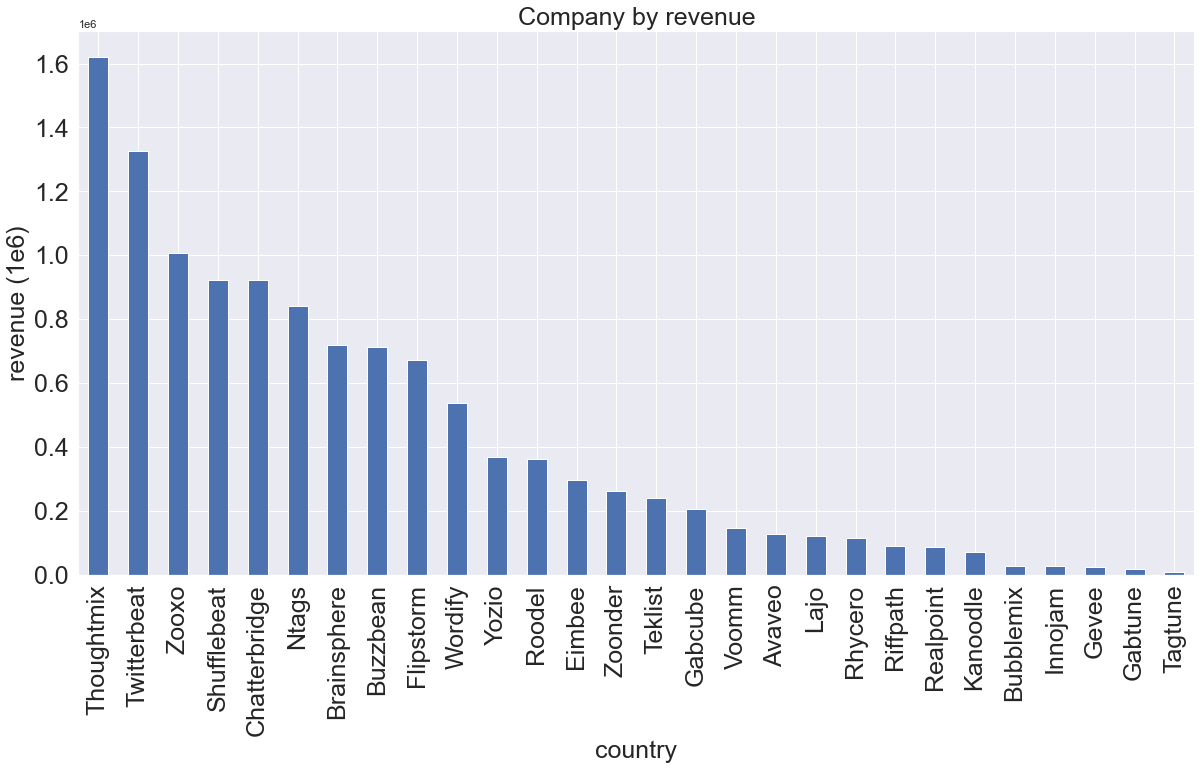

In [89]:
# your code goes here
!pip install pandasql==0.7.3
import pandasql as psql
%matplotlib inline

psql.sqldf("""
      SELECT company,
             SUM (price_to_euro) AS revenue
    FROM df_transactions_cleaned
    GROUP BY company
    ORDER BY SUM (price_to_euro) DESC   
""").plot(kind='bar', x='company', y='revenue', figsize=(20,10),  legend=False)

plt.xticks(rotation=90, fontsize=25)
plt.ylabel('revenue (1e6)', fontsize=25)
plt.xlabel('country', fontsize=25)
plt.title('Company by revenue', fontsize=25)
plt.yticks(fontsize=25)
plt.show()

### Country by revenue, per year

The revenue of a country in a time period, is its total value of orders in that time period. Compute and visualise all countries by revenue, for years 2016, 2017 and 2018. Your visualisation should have countries on the x-axis and multiple bars (one for each year).

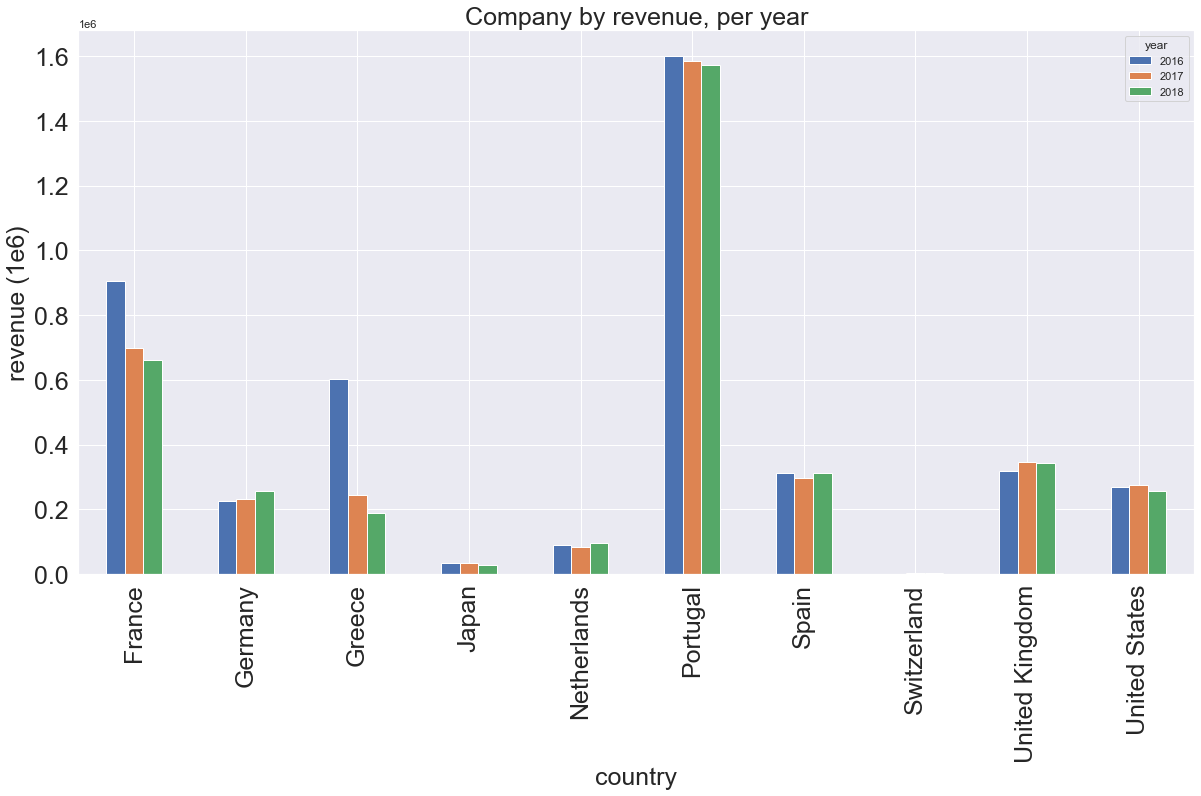

In [90]:
# your code goes here

psql.sqldf("""
  SELECT country,
            year,
     SUM (price_to_euro) AS revenue
    FROM df_transactions_cleaned 
   WHERE(( year >= '2016' ) AND ( year <'2019' ))
GROUP BY country, year
""").pivot(index='country', columns='year', values='revenue').plot(kind='bar', figsize=(20,10))

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('revenue (1e6)', fontsize=25)
plt.xlabel('country', fontsize=25)
plt.title('Company by revenue, per year', fontsize=25)

plt.show()

### Orders per quarter, all companies

Compute and visualise the number of orders each company has placed in each quarter. Exclude quarters where the order count is less than 3. As always, be mindful to not produce a cluttered visualisation.

Part of your query should form a variable that converts `date` into `YEAR_QUARTER` format. Dealing with dates is via `STRFTIME` [docs](https://www.sqlite.org/lang_datefunc.html) which doesn't allow quarter extraction. Instead, it allows for extraction of month, which you can case on in order to produce the quarter (Q1, Q2, Q3, Q4).  

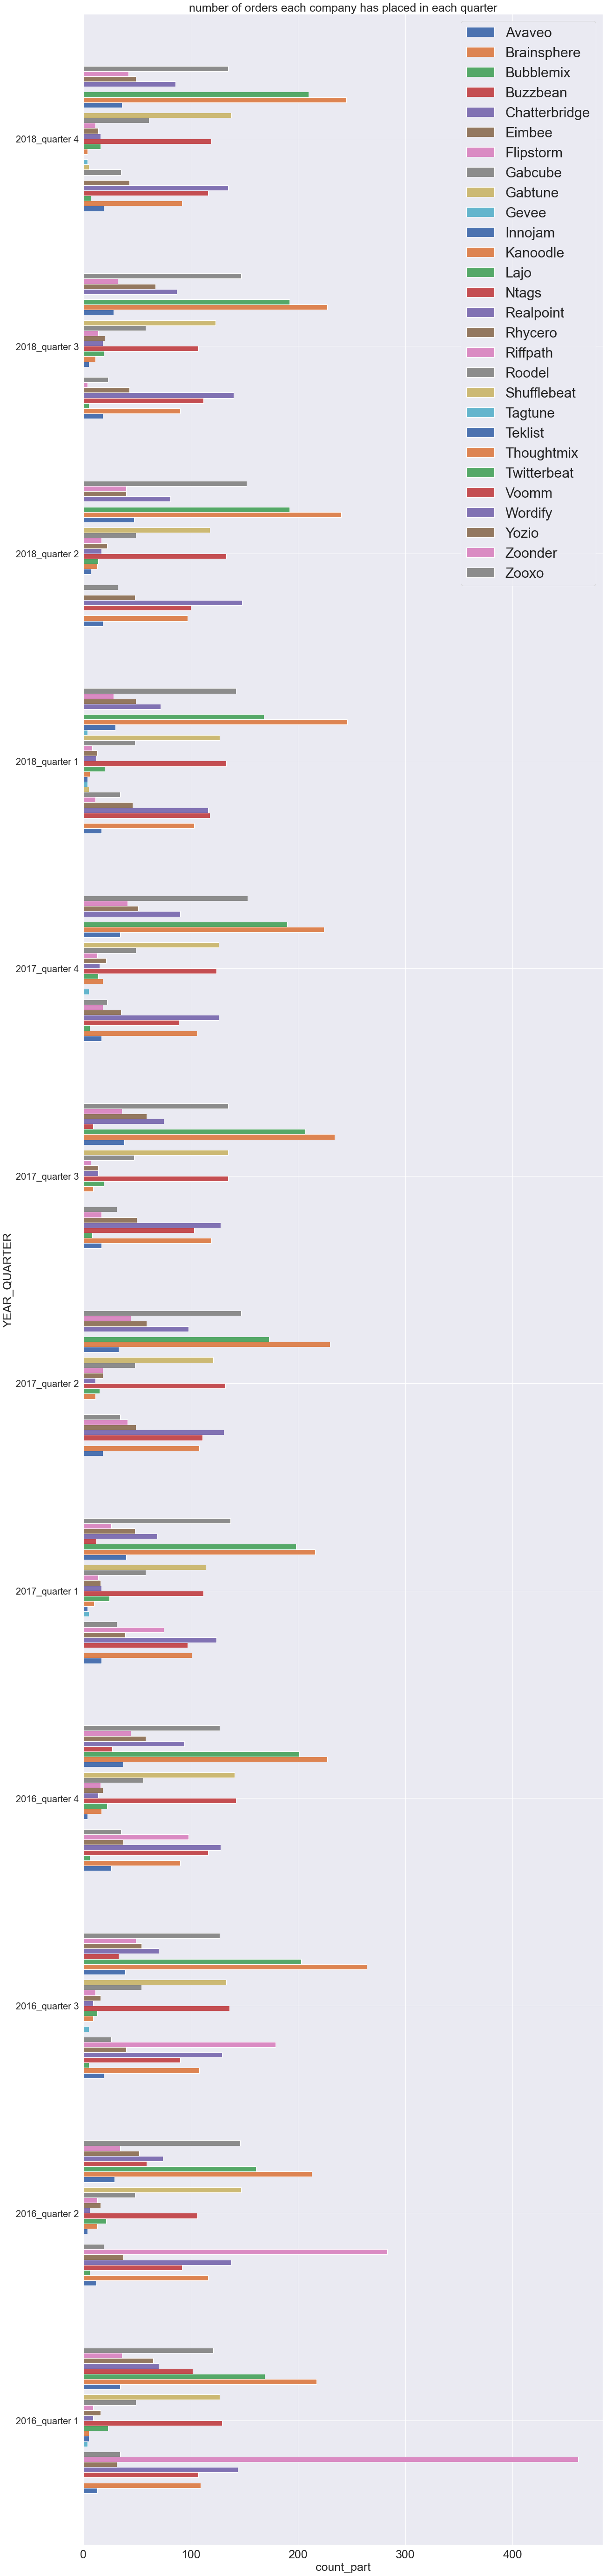

In [97]:
# your code goes here
psql.sqldf("""
WITH df_year_quarters AS (
    SELECT company,
        part,
        strftime('%m', date) AS "month",
        date,
        year,
        'quarter ' || COALESCE((Month - 1) / 3 + 1 , 0) AS quarter,
        COUNT(part) as count_part
        FROM df_transactions_cleaned
        GROUP BY company, year, quarter
        HAVING count_part > 3
)
SELECT company,
   part,
   month,
   date
   quarter,
   count_part,
   year || '_' || quarter AS YEAR_QUARTER
FROM df_year_quarters
""").pivot(index='YEAR_QUARTER', columns='company', values='count_part').plot(kind='barh',
                                                                           figsize=(20,100), align='center', width=.7)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.ylabel('YEAR_QUARTER', fontsize=25)
plt.xlabel('count_part', fontsize=25)
plt.title('number of orders each company has placed in each quarter', fontsize=25)
plt.legend(prop={"size":30})
plt.show()



## Part 4: Parts and prices (20 pts)

### Parts demand changes

A different amount of orders are placed on parts each year. The demand of a part is the number of orders placed on it. The demand change of a part is the absolute difference between its average demand in 2016/2017, and its demand in 2018.

Compute and visualise the 15 parts whose demand change has been the largest.

In [ ]:
# your code goes here
psql.sqldf("""
    WITH demand_2018 AS (
            SELECT part,
                   year,
                   COUNT (part) AS demand_part_2018
            FROM df_transactions_cleaned
            WHERE year = 2018
            GROUP BY part, year
    ), demand_2017 AS (
            SELECT part,
                   year,
                   COUNT (part) AS demand_part_2017
            FROM df_transactions_cleaned
            WHERE year = 2017
            GROUP BY part, year
    ), demand_2016 AS (
            SELECT part,
                   year,
                   COUNT (part) AS demand_part_2016
            FROM df_transactions_cleaned
            WHERE year = 2016
            GROUP BY part, year
    )

    SELECT demand_2018.part,
            ABS(demand_part_2018 - ((demand_part_2016 + demand_part_2017)/2)) AS demand_change, 
            demand_2018.year AS year_2018,
            demand_2018.demand_part_2018 AS demand_part_2018,
            demand_2017.year AS year_2017,
            demand_2017.demand_part_2017 AS demand_part_2017,
            demand_2016.year AS year_2016,
            demand_2016.demand_part_2016 AS demand_part_2016
     FROM demand_2018 
     INNER JOIN demand_2016 
         ON demand_2018.part = demand_2016.part
     INNER JOIN demand_2017 
         ON demand_2017.part = demand_2016.part
     ORDER BY demand_change DESC
     LIMIT 15
""").plot(kind='bar', x='part', y='demand_change', figsize=(20,10), legend=False)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('demand change', fontsize=25)
plt.title('Parts demand changes', fontsize=25)
plt.xlabel('part', fontsize=25)
plt.show()

### Popular parts pricing

The most popular parts are those whose demand has increased the most from its 2016/2017 average to 2018. We're interested to find out if popularity is due to a price drop, and also inform us if prices of these parts are properly adjusted.

The demand increase of a part is its 2018 demand minus its 2016/2017 average demand. The price change of a part is its average 2018 price minus its average 2016/2017 price.

Compute the parts whose demand has increased (has positive demand increase) and the change in price for each of these parts. Then visualise this relationship and include in the figure title the correlation (compute via pandas) between these two variables. Conclude which is most likely 1) Parts became more popular from a drop in prices, or 2) The sales department deserved its bonuses.

In [93]:
def linear_regression(x, y):    
    
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))  
    
    return B0, B1

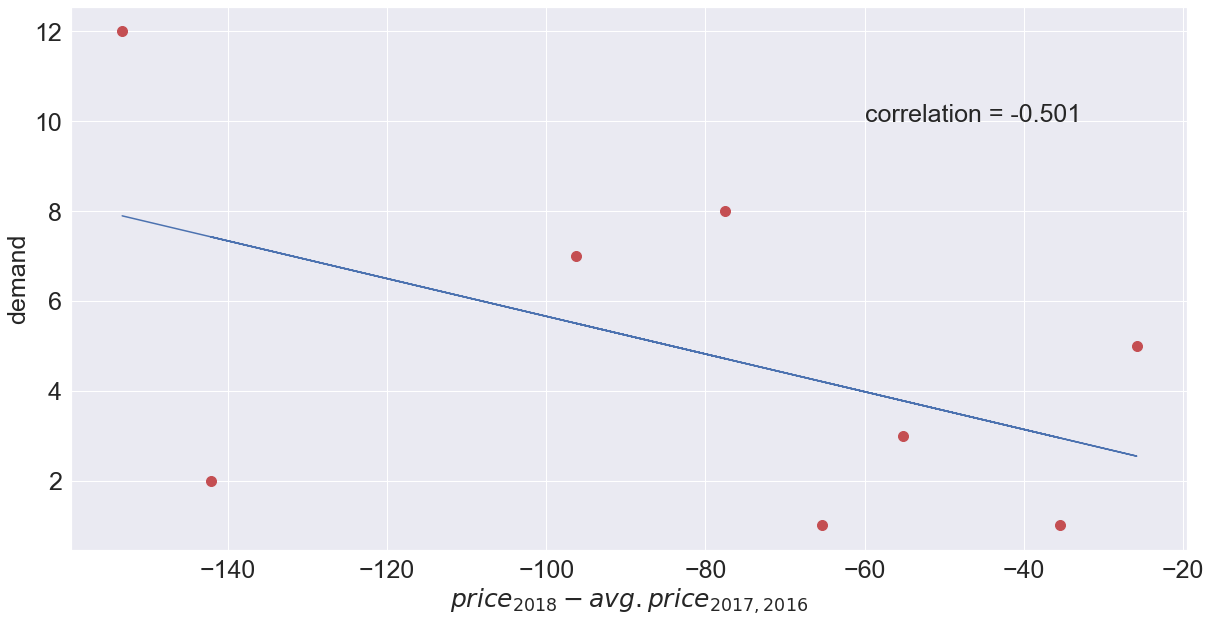

In [94]:
# your code goes here
df_popularity = psql.sqldf("""
      WITH demand_2018 AS (
            SELECT part,
                   year,
                   price AS price_2018,
                   COUNT (part) AS demand_part_2018
            FROM df_transactions_cleaned
            WHERE year = 2018
            GROUP BY part, year
      ), demand_2017 AS (
            SELECT part,
                   year,
                   price AS price_2017,
                   COUNT (part) AS demand_part_2017
            FROM df_transactions_cleaned
            WHERE year = 2017
            GROUP BY part, year
      ), demand_2016 AS (
            SELECT part,
                   year,
                   price AS price_2016,
                   COUNT (part) AS demand_part_2016
            FROM df_transactions_cleaned
            WHERE year = 2016
            GROUP BY part, year
      )
    SELECT demand_2018.part,
            demand_2018.year AS year_2018,
            demand_2018.demand_part_2018 AS demand_part_2018,
            demand_2017.year AS year_2017,
            demand_2017.demand_part_2017 AS demand_part_2017,
            demand_2016.year AS year_2017,
            demand_2016.demand_part_2016 AS demand_part_2016,
            demand_part_2018 - ((demand_part_2016 + demand_part_2017)/2)  AS demand_difference,
            price_2018 - ((price_2016 + price_2017)/2) AS price_difference
     FROM demand_2018
     INNER JOIN demand_2016 ON demand_2018.part = demand_2016.part
     INNER JOIN demand_2017 ON demand_2017.part = demand_2016.part
     WHERE demand_difference > 0 AND price_difference < 0
     ORDER BY demand_difference DESC
""")
df_popularity.plot(kind='scatter', x='price_difference', y='demand_difference', color='r', figsize=(20,10), s=100)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('demand', fontsize=25)
plt.xlabel('$price_{2018} - avg.price_{2017,2016}$', fontsize=25)

# correlation
corr = np.round(df_popularity['price_difference'].corr(df_popularity['demand_difference']), decimals=3)

x = df_popularity.price_difference
y = df_popularity.demand_difference

plt.plot(x, x*linear_regression(x,y)[1] + linear_regression(x,y)[0])
plt.text(x=-60, y=10, s=f'correlation = {corr}', fontsize=25);

In [95]:
print(df_popularity['demand_difference'].corr(df_popularity.price_difference))

-0.5010839304833671


**your explanation goes here**

x-axis represents an increment: difference over prices in 2018 and avg.prices in 2016/17. Since we want to visualize the drop in prices, we just plot the negative increment.
We can see that this increment becomes less negative (i.e. prices_2018 increses overall) while the demand decreases so we can conclude that it is more likely for the demand to decrease while prices in 2018 increase
